# Dont-Get-Kicked


## Order of the Program <br>
-Problem Decription<br>
-Importing and downloading the dataset<br>
-Analyzing the dataset<br>
-Filling missing numeric columns<br>
-Scaling numeric feature<br>
-Encoding categorical data<br>
-Spliting into train/test<br>
-Traing Random Forest Classifier<br>
--Hyperparameter tunning for Random forest classifier<br>
-Trainging LGBClassifier<br>
--Hyperparameter tunning for LGBClassifier<br>
-Making predictions on Test set<br>
-Making submission<br>
-Saving trained model<br>
-Summary and Reference<br>

In [2]:
!pip install jovian --upgrade --quiet

In [3]:
import jovian

In [4]:
# Execute this to save new versions of the notebook
jovian.commit(project="dont-get-kicked")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/egwusamuel2015/dont-get-kicked


'https://jovian.ai/egwusamuel2015/dont-get-kicked'

![](https://www.autoauctionmall.com/learning-center/contents/uploads/2015/10/Car-Auction-Live4-e1445533888716-1024x428.jpg)

## Discription

  One of the biggest challenges of an auto dealership purchasing a used car at an auto auction is the risk of that the vehicle might have serious issues that prevent it from being sold to customers. The auto community calls these unfortunate purchases "kicks".

Kicked cars often result when there are tampered odometers, mechanical issues the dealer is not able to address, issues with getting the vehicle title from the seller, or some other unforeseen problem. Kick cars can be very costly to dealers after transportation cost, throw-away repair work, and market losses in reselling the vehicle.

Modelers who can figure out which cars have a higher risk of being kick can provide real value to dealerships trying to provide the best inventory selection possible to their customers.

The challenge of this competition is to predict if the car purchased at the Auction is a Kick (bad buy).


## importing and downloading the dataset

In [5]:
!pip install numpy pandas matplotlib seaborn --quiet

In [6]:
!pip install scitit-learn --quiet

ERROR: Could not find a version that satisfies the requirement scitit-learn (from versions: none)
ERROR: No matching distribution found for scitit-learn


In [7]:
!pip install opendatasets xgboost lightgbm --upgrade --quiet

     |████████████████████████████████| 166.7 MB 18 kB/s 
     |████████████████████████████████| 2.0 MB 60.6 MB/s 


In [8]:
import os
import opendatasets as od
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 120)

In [9]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/egwusamuel2015/dont-get-kicked


'https://jovian.ai/egwusamuel2015/dont-get-kicked'

In [9]:
od.download('https://www.kaggle.com/c/DontGetKicked/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: samuelegwu
Your Kaggle Key: ··········


100%|██████████| 10.2M/10.2M [00:00<00:00, 103MB/s]


Extracting archive ./DontGetKicked/DontGetKicked.zip to ./DontGetKicked


In [11]:
os.listdir('DontGetKicked')

['example_entry.csv',
 'test.csv',
 'training.zip',
 'training.csv',
 'test.zip',
 'Carvana_Data_Dictionary.txt']

In [10]:
input_df = pd.read_csv('./DontGetKicked/training.csv')

In [11]:
test_df = pd.read_csv('./DontGetKicked/test.csv')

In [12]:
example_entry_df = pd.read_csv('./DontGetKicked/example_entry.csv')

In [ ]:
input_df

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,AUTO,1.0,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,AUTO,1.0,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,AUTO,2.0,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,SILVER,AUTO,1.0,Alloy,65617,AMERICAN,COMPACT,CHRYSLER,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,MANUAL,2.0,Covers,69367,AMERICAN,COMPACT,FORD,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,73010,1,12/2/2009,ADESA,2001,8,MERCURY,SABLE,GS,4D SEDAN GS,BLACK,AUTO,1.0,Alloy,45234,AMERICAN,MEDIUM,FORD,1996.0,2993.0,2656.0,3732.0,2190.0,3055.0,4836.0,5937.0,NaN,NaN,18111,30212,GA,4200.0,0,993
72979,73011,0,12/2/2009,ADESA,2007,2,CHEVROLET,MALIBU 4C,LS,4D SEDAN LS,SILVER,AUTO,NaN,NaN,71759,AMERICAN,MEDIUM,GM,6418.0,7325.0,7431.0,8411.0,6785.0,8132.0,10151.0,11652.0,NaN,NaN,18881,30212,GA,6200.0,0,1038
72980,73012,0,12/2/2009,ADESA,2005,4,JEEP,GRAND CHEROKEE 2WD V,Lar,4D WAGON LAREDO,SILVER,AUTO,1.0,Alloy,88500,AMERICAN,MEDIUM SUV,CHRYSLER,8545.0,9959.0,9729.0,11256.0,8375.0,9802.0,11831.0,14402.0,NaN,NaN,18111,30212,GA,8200.0,0,1893
72981,73013,0,12/2/2009,ADESA,2006,3,CHEVROLET,IMPALA,LS,4D SEDAN LS,WHITE,AUTO,1.0,Alloy,79554,AMERICAN,LARGE,GM,6420.0,7604.0,7434.0,8712.0,6590.0,7684.0,10099.0,11228.0,NaN,NaN,18881,30212,GA,7000.0,0,1974


In [ ]:
test_df.head()

,RefId,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,73015,12/2/2009,ADESA,2005,4,PONTIAC,GRAND PRIX,Bas,4D SEDAN,SILVER,AUTO,1.0,Alloy,85377,AMERICAN,LARGE,GM,5032.0,6386.0,5935.0,7397.0,4905.0,6181.0,8557.0,9752.0,NaN,NaN,18881,30212,GA,6500.0,0,2152
1,73016,12/2/2009,ADESA,2005,4,CHEVROLET,MALIBU V6,LS,4D SEDAN LS,SILVER,AUTO,1.0,Alloy,61873,AMERICAN,MEDIUM,GM,4502.0,5685.0,5362.0,6640.0,4645.0,5710.0,7562.0,9296.0,NaN,NaN,18111,30212,GA,6300.0,0,1118
2,73017,12/2/2009,ADESA,2006,3,DODGE,DURANGO 2WD V8,Adv,4D SUV 4.7L ADVENTURER,SILVER,AUTO,1.0,Alloy,69283,AMERICAN,MEDIUM SUV,CHRYSLER,10244.0,13041.0,11564.0,14584.0,10883.0,12166.0,15340.0,16512.0,NaN,NaN,18111,30212,GA,9700.0,0,1215
3,73018,12/2/2009,ADESA,2002,7,SATURN,L SERIES,L20,4D SEDAN L200,GOLD,AUTO,1.0,Alloy,87889,AMERICAN,MEDIUM,GM,2558.0,3542.0,3263.0,4325.0,2928.0,3607.0,5725.0,6398.0,NaN,NaN,18881,30212,GA,4150.0,0,1933
4,73019,12/2/2009,ADESA,2007,2,HYUNDAI,ACCENT,GS,2D COUPE GS,BLUE,AUTO,NaN,NaN,73432,OTHER ASIAN,COMPACT,OTHER,5013.0,6343.0,5914.0,7350.0,5013.0,6343.0,5914.0,7350.0,NaN,NaN,18111,30212,GA,4100.0,0,920


In [ ]:
example_entry_df.head()

,RefId,IsBadBuy
0,73015,0
1,73016,0
2,73017,0
3,73018,0
4,73019,0


## Analyzing the dataset

In [ ]:
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              72983 non-null  int64  
 1   IsBadBuy                           72983 non-null  int64  
 2   PurchDate                          72983 non-null  object 
 3   Auction                            72983 non-null  object 
 4   VehYear                            72983 non-null  int64  
 5   VehicleAge                         72983 non-null  int64  
 6   Make                               72983 non-null  object 
 7   Model                              72983 non-null  object 
 8   Trim                               70623 non-null  object 
 9   SubModel                           72975 non-null  object 
 10  Color                              72975 non-null  object 
 11  Transmission                       72974 non-null  obj

The dataset contain some null value<br/>
lets visualize to how how much of null is present

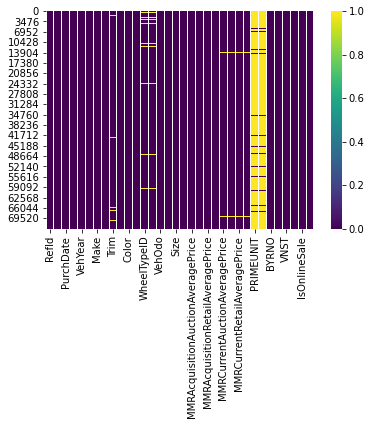

In [ ]:
sns.heatmap(input_df.isnull(), cmap='viridis')

In [ ]:
input_df.isnull().sum()

RefId                                    0
IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  2360
SubModel                                 8
Color                                    8
Transmission                             9
WheelTypeID                           3169
WheelType                             3174
VehOdo                                   0
Nationality                              5
Size                                     5
TopThreeAmericanName                     5
MMRAcquisitionAuctionAveragePrice       18
MMRAcquisitionAuctionCleanPrice         18
MMRAcquisitionRetailAveragePrice        18
MMRAcquisitonRetailCleanPrice           18
MMRCurrentAuctionAveragePrice          315
MMRCurrentA

In [13]:
# Let's split the PurchDate column into different column year, month, day respectively


def splitPurchDate(df):
    df['PurchDate'] = pd.to_datetime(df['PurchDate'])
    df['Year'] = df.PurchDate.dt.year
    df['Month'] = df.PurchDate.dt.month
    df['Day'] = df.PurchDate.dt.day

In [14]:
splitPurchDate(input_df)
splitPurchDate(test_df)

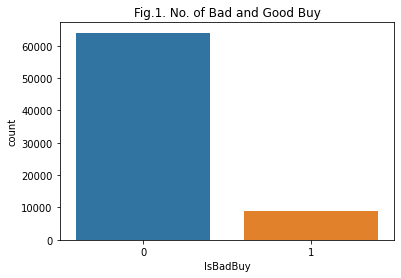

In [15]:
plt.title('Fig.1. No. of Bad and Good Buy')
sns.countplot(x='IsBadBuy', data= input_df)

From this seaborn plot we can see that there are more Bad Buy than Good Buy. the probability of purchasing a bad car is higher than purchasing a good one. as such clients are going need all the help they can get if they must get a good purchase

In [ ]:
px.scatter(input_df, 
           x='VehYear', 
           y='WarrantyCost', 
           color='IsBadBuy', 
           hover_data=['Transmission'], opacity=0.8, 
           title='Fig.2. Vehicle year vs MMRAcquisitionAuctionCleanPrice')

Let's make Different plots for the year of production for vehicles

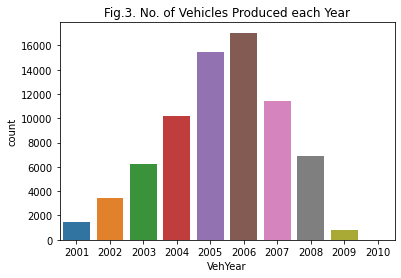

In [ ]:
plt.title('Fig.3. No. of Vehicles Produced each Year')
sns.countplot(data=input_df, x='VehYear')

In [ ]:
px.histogram(input_df, x='VehYear',
                   color='IsBadBuy',
                   title='Fig.4. Bad Buy for each Year' )

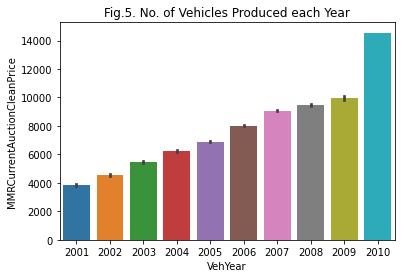

In [ ]:
plt.title('Fig.5. No. of Vehicles Produced each Year')
sns.barplot(data=input_df, x='VehYear', y='MMRCurrentAuctionCleanPrice')

In [16]:
# The WheelTypeID column is of no importance to our model so let's drop it

input_df.drop('WheelTypeID', axis=1, inplace=True)
test_df.drop('WheelTypeID', axis=1, inplace=True)

The dataset contains various prices at different sales center. let's further split (via mathematical means) the prices for more understanding.

In [17]:
def difference_MMRAcquiAucCleanPrice(df):
    # Clean Price and Average differences
    df['DifferenceOf_MMRAcquisitionAuction_AvergePrice_And_CleanPrice'] = df['MMRAcquisitionAuctionCleanPrice'] - df['MMRAcquisitionAuctionAveragePrice']
    df['DifferenceOf_MMRAcquisitionRetail_AvergePrice_And_CleanPrice'] = df['MMRAcquisitonRetailCleanPrice'] - df['MMRAcquisitionRetailAveragePrice']    
    df['DifferenceOf_MMRCurrentAuction_AvergePrice_And_CleanPrice'] = df['MMRCurrentAuctionCleanPrice'] - df['MMRCurrentAuctionAveragePrice']
    df['DifferenceOf_MMRCurrentRetail_AvergePrice_And_CleanPrice'] = df['MMRCurrentRetailCleanPrice'] - df['MMRCurrentRetailAveragePrice']
    
    # Differences in Aquisition and Current CleanPrice
    df['DifferenceOf_MMRAcquisitionAuction_And_CurrentAuction_CleanPrice'] = df['MMRAcquisitionAuctionCleanPrice'] - df['MMRCurrentAuctionCleanPrice']
    df['DifferenceOf_MMRAcquisitionRetail_And_CurrentRetail_CleanPrice'] = df['MMRAcquisitonRetailCleanPrice'] - df['MMRCurrentRetailCleanPrice']
    
    # Differences in AquisitionRetail and AquisitionAuction CleanPrice
    df['DifferenceOf_MMRAcquisitionRetail_And_AquisitionAuction_CleanPrice'] = df['MMRAcquisitonRetailCleanPrice'] - df['MMRAcquisitionAuctionCleanPrice']
    
    # Differences in CurrentRetail and CurrentAuction Clean price
    df['DifferenceOf_MMRCurrentRetail_And_CurrentAuction_CleanPrice'] = df['MMRCurrentRetailCleanPrice'] - df['MMRCurrentAuctionCleanPrice']
    
    # 
    df['DifferenceOf_VehBCost_And_AquisitionAuction_CleanPrice'] = df['MMRAcquisitionAuctionCleanPrice'] - df['VehBCost']
    df['DifferenceOf_VehBCost_And_AquisitionRetail_CleanPrice'] = df['MMRAcquisitonRetailCleanPrice'] - df['VehBCost']    
    df['DifferenceOf_VehBCost_And_CurrentAuction_CleanPrice'] = df['MMRCurrentAuctionCleanPrice'] - df['VehBCost']        
    df['DifferenceOf_VehBCost_And_CurrentRetail_CleanPrice'] = df['MMRCurrentRetailCleanPrice'] - df['VehBCost']        


In [18]:
difference_MMRAcquiAucCleanPrice(input_df)
difference_MMRAcquiAucCleanPrice(test_df)

In [ ]:
input_df.head(2)

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,Year,Month,Day,DifferenceOf_MMRAcquisitionAuction_AvergePrice_And_CleanPrice,DifferenceOf_MMRAcquisitionRetail_AvergePrice_And_CleanPrice,DifferenceOf_MMRCurrentAuction_AvergePrice_And_CleanPrice,DifferenceOf_MMRCurrentRetail_AvergePrice_And_CleanPrice,DifferenceOf_MMRAcquisitionAuction_And_CurrentAuction_CleanPrice,DifferenceOf_MMRAcquisitionRetail_And_CurrentRetail_CleanPrice,DifferenceOf_MMRAcquisitionRetail_And_AquisitionAuction_CleanPrice,DifferenceOf_MMRCurrentRetail_And_CurrentAuction_CleanPrice,DifferenceOf_VehBCost_And_AquisitionAuction_CleanPrice,DifferenceOf_VehBCost_And_AquisitionRetail_CleanPrice,DifferenceOf_VehBCost_And_CurrentAuction_CleanPrice,DifferenceOf_VehBCost_And_CurrentRetail_CleanPrice
0,1,0,2009-12-07,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,AUTO,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113,2009,12,7,1674.0,1964.0,1101.0,812.0,1277.0,1191.0,3771.0,3857.0,2729.0,6500.0,1452.0,5309.0
1,2,0,2009-12-07,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,AUTO,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053,2009,12,7,1529.0,1675.0,1766.0,1417.0,-839.0,-219.0,4189.0,3569.0,783.0,4972.0,1622.0,5191.0


In [19]:
input_cols = input_df.columns[3:]
target_cols = input_df.columns[1]

In [ ]:
input_cols

Index(['Auction', 'VehYear', 'VehicleAge', 'Make', 'Model', 'Trim', 'SubModel',
       'Color', 'Transmission', 'WheelType', 'VehOdo', 'Nationality', 'Size',
       'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'PRIMEUNIT', 'AUCGUART', 'BYRNO',
       'VNZIP1', 'VNST', 'VehBCost', 'IsOnlineSale', 'WarrantyCost', 'Year',
       'Month', 'Day',
       'DifferenceOf_MMRAcquisitionAuction_AvergePrice_And_CleanPrice',
       'DifferenceOf_MMRAcquisitionRetail_AvergePrice_And_CleanPrice',
       'DifferenceOf_MMRCurrentAuction_AvergePrice_And_CleanPrice',
       'DifferenceOf_MMRCurrentRetail_AvergePrice_And_CleanPrice',
       'DifferenceOf_MMRAcquisitionAuction_And_CurrentAuction_CleanPrice',
       'DifferenceOf_MMRAcqui

In [ ]:
target_cols

'IsBadBuy'

In [20]:
inputs = input_df[input_cols].copy()
targets = input_df[target_cols].copy()

In [21]:
test_inputs = test_df[input_cols].copy()

In [ ]:
inputs

,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,Year,Month,Day,DifferenceOf_MMRAcquisitionAuction_AvergePrice_And_CleanPrice,DifferenceOf_MMRAcquisitionRetail_AvergePrice_And_CleanPrice,DifferenceOf_MMRCurrentAuction_AvergePrice_And_CleanPrice,DifferenceOf_MMRCurrentRetail_AvergePrice_And_CleanPrice,DifferenceOf_MMRAcquisitionAuction_And_CurrentAuction_CleanPrice,DifferenceOf_MMRAcquisitionRetail_And_CurrentRetail_CleanPrice,DifferenceOf_MMRAcquisitionRetail_And_AquisitionAuction_CleanPrice,DifferenceOf_MMRCurrentRetail_And_CurrentAuction_CleanPrice,DifferenceOf_VehBCost_And_AquisitionAuction_CleanPrice,DifferenceOf_VehBCost_And_AquisitionRetail_CleanPrice,DifferenceOf_VehBCost_And_CurrentAuction_CleanPrice,DifferenceOf_VehBCost_And_CurrentRetail_CleanPrice
0,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,AUTO,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113,2009,12,7,1674.0,1964.0,1101.0,812.0,1277.0,1191.0,3771.0,3857.0,2729.0,6500.0,1452.0,5309.0
1,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,AUTO,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053,2009,12,7,1529.0,1675.0,1766.0,1417.0,-839.0,-219.0,4189.0,3569.0,783.0,4972.0,1622.0,5191.0
2,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,AUTO,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389,2009,12,7,1558.0,1514.0,1522.0,1556.0,-797.0,-245.0,3697.0,3145.0,-140.0,3557.0,657.0,3802.0
3,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,SILVER,AUTO,Alloy,65617,AMERICAN,COMPACT,CHRYSLER,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630,2009,12,7,782.0,1032.0,802.0,1143.0,29.0,172.0,3015.0,2872.0,-1425.0,1590.0,-1454.0,1418.0
4,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,MANUAL,Covers,69367,AMERICAN,COMPACT,FORD,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020,2009,12,7,1141.0,984.0,1137.0,1172.0,670.0,796.0,3653.0,3527.0,1054.0,4707.0,384.0,3911.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,ADESA,2001,8,MERCURY,SABLE,GS,4D SEDAN GS,BLACK,AUTO,Alloy,45234,AMERICAN,MEDIUM,FORD,1996.0,2993.0,2656.0,3732.0,2190.0,3055.0,4836.0,5937.0,NaN,NaN,18111,30212,GA,4200.0,0,993,2009,12,2,997.0,1076.0,865.0,1101.0,-62.0,-2205.0,739.0,2882.0,-1207.0,-468.0,-1145.0,1737.0
72979,ADESA,2007,2,CHEVROLET,MALIBU 4C,LS,4D SEDAN LS,SILVER,AUTO,NaN,71759,AMERICAN,MEDIUM,GM,6418.0,7325.0,7431.0,8411.0,6785.0,8132.0,10151.0,11652.0,NaN,NaN,18881,30212,GA,6200.0,0,1038,2009,12,2,907.0,980.0,1347.0,1501.0,-807.0,-3241.0,1086.0,3520.0,1125.0,2211.0,1932.0,5452.0
72980,ADESA,2005,4,JEEP,GRAND CHEROKEE 2WD V,Lar,4D WAGON LAREDO,SILVER,AUTO,Alloy,88500,AMERICAN,MEDIUM SUV,CHRYSLER,8545.0,9959.0,9729.0,11256.0,8375.0,9802.0,11831.0,14402.0,NaN,NaN,18111,30212,GA,8200.0,0,1893,2009,12,2,1414.0,1527.0,1427.0,2571.0,157.0,-3146.0,1297.0,4600.0,1759.0,3056.0,1602.0,6202.0
72981,ADESA,2006,3,CHEVROLET,IMPALA,LS,4D SEDAN LS,WHITE,AUTO,Alloy,79554,AMERICAN,LARGE,GM,6420.0,7604.0,7434.0,8712.0,6590.0,7684.0,10099.0,11228.0,NaN,NaN,18881,30212,GA,7000.0,0,1974,2009,12,2,1184.0,1278.0,1094.0,1129.0,-80.0,-2516.0,1108.0,3544.0,604.0,1712.0,684.0,4228.0


In [ ]:
targets

0        0
1        0
2        0
3        0
4        0
        ..
72978    1
72979    0
72980    0
72981    0
72982    0
Name: IsBadBuy, Length: 72983, dtype: int64

In [22]:
numeric_cols = inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = inputs.select_dtypes('object').columns.tolist()

In [24]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/egwusamuel2015/dont-get-kicked


'https://jovian.ai/egwusamuel2015/dont-get-kicked'

## Filling missing numeric columns with thier 'mean' values respectively

In [ ]:
inputs[numeric_cols].describe()

,VehYear,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost,Year,Month,Day,DifferenceOf_MMRAcquisitionAuction_AvergePrice_And_CleanPrice,DifferenceOf_MMRAcquisitionRetail_AvergePrice_And_CleanPrice,DifferenceOf_MMRCurrentAuction_AvergePrice_And_CleanPrice,DifferenceOf_MMRCurrentRetail_AvergePrice_And_CleanPrice,DifferenceOf_MMRAcquisitionAuction_And_CurrentAuction_CleanPrice,DifferenceOf_MMRAcquisitionRetail_And_CurrentRetail_CleanPrice,DifferenceOf_MMRAcquisitionRetail_And_AquisitionAuction_CleanPrice,DifferenceOf_MMRCurrentRetail_And_CurrentAuction_CleanPrice,DifferenceOf_VehBCost_And_AquisitionAuction_CleanPrice,DifferenceOf_VehBCost_And_AquisitionRetail_CleanPrice,DifferenceOf_VehBCost_And_CurrentAuction_CleanPrice,DifferenceOf_VehBCost_And_CurrentRetail_CleanPrice
count,72983.000000,72983.000000,72983.000000,72965.000000,72965.000000,72965.000000,72965.000000,72668.000000,72668.000000,72668.000000,72668.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72965.000000,72965.000000,72668.000000,72668.000000,72668.000000,72668.000000,72965.000000,72668.000000,72965.000000,72965.000000,72668.000000,72668.000000
mean,2005.343052,4.176644,71499.995917,6128.909217,7373.636031,8497.034332,9850.928240,6132.081287,7390.681827,8775.723331,10145.385314,26345.842155,58043.059945,6730.934326,0.025280,1276.580985,2009.519600,6.608018,15.667443,1244.726814,1353.893908,1258.600539,1369.661983,-15.987532,-288.897039,2477.292209,2754.703487,643.351992,3120.644200,660.018881,3414.722368
std,1.731252,1.712210,14578.913128,2461.992768,2722.491986,3156.285284,3385.789541,2434.567723,2686.248852,3090.702941,3310.254351,25717.351219,26151.640415,1767.846435,0.156975,598.846788,0.499619,3.415754,8.494650,444.148231,511.962276,435.705263,507.676777,997.413983,1447.372291,1395.430846,1335.965684,1736.322301,2381.499091,1726.101800,2286.236327
min,2001.000000,0.000000,4825.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,2764.000000,1.000000,0.000000,462.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-17052.000000,-20299.000000,-1.000000,-1.000000,-12045.000000,-12045.000000,-12045.000000,-12045.000000
25%,2004.000000,3.000000,61837.000000,4273.000000,5406.000000,6280.000000,7493.000000,4275.000000,5414.000000,6536.000000,7784.000000,17212.000000,32124.000000,5435.000000,0.000000,837.000000,2009.000000,4.000000,9.000000,979.000000,1037.000000,987.000000,1045.000000,-324.000000,-615.000000,1081.000000,1188.000000,-322.000000,1650.000000,-379.000000,1974.000000
50%,2005.000000,4.000000,73361.000000,6097.000000,7303.000000,8444.000000,9789.000000,6062.000000,7313.000000,8729.000000,10103.000000,19662.000000,73108.000000,6700.000000,0.000000,1155.000000,2010.000000,7.000000,16.000000,1192.000000,1294.000000,1206.000000,1308.000000,0.000000,0.000000,2936.000000,3254.000000,590.000000,3107.000000,570.000000,3429.000000
75%,2007.000000,5.000000,82436.000000,7765.000000,9021.000000,10651.000000,12088.000000,7736.000000,9013.000000,10911.000000,12309.000000,22808.000000,80022.000000,7900.000000,0.000000,1623.000000,2010.000000,10.000000,23.000000,1471.000000,1621.000000,1476.000000,1635.000000,360.000000,322.000000,3661.000000,3741.000000,1459.000000,4595.000000,1517.000000,4806.250000
max,2010.000000,9.000000,115717.000000,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,99761.000000,99224.000000,45469.000000,1.000000,7498.000000,2010.000000,12.000000,31.000000,5099.000000,6154.000000,5099.000000,6043.000000,23021.000000,25363.000000,9557.000000,11492.000000,13248.140000,17033.000000,14347.000000,16915.000000


In [ ]:
inputs[numeric_cols]

,VehYear,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost,Year,Month,Day,DifferenceOf_MMRAcquisitionAuction_AvergePrice_And_CleanPrice,DifferenceOf_MMRAcquisitionRetail_AvergePrice_And_CleanPrice,DifferenceOf_MMRCurrentAuction_AvergePrice_And_CleanPrice,DifferenceOf_MMRCurrentRetail_AvergePrice_And_CleanPrice,DifferenceOf_MMRAcquisitionAuction_And_CurrentAuction_CleanPrice,DifferenceOf_MMRAcquisitionRetail_And_CurrentRetail_CleanPrice,DifferenceOf_MMRAcquisitionRetail_And_AquisitionAuction_CleanPrice,DifferenceOf_MMRCurrentRetail_And_CurrentAuction_CleanPrice,DifferenceOf_VehBCost_And_AquisitionAuction_CleanPrice,DifferenceOf_VehBCost_And_AquisitionRetail_CleanPrice,DifferenceOf_VehBCost_And_CurrentAuction_CleanPrice,DifferenceOf_VehBCost_And_CurrentRetail_CleanPrice
0,2006,3,89046,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,21973,33619,7100.0,0,1113,2009,12,7,1674.0,1964.0,1101.0,812.0,1277.0,1191.0,3771.0,3857.0,2729.0,6500.0,1452.0,5309.0
1,2004,5,93593,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,19638,33619,7600.0,0,1053,2009,12,7,1529.0,1675.0,1766.0,1417.0,-839.0,-219.0,4189.0,3569.0,783.0,4972.0,1622.0,5191.0
2,2005,4,73807,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,19638,33619,4900.0,0,1389,2009,12,7,1558.0,1514.0,1522.0,1556.0,-797.0,-245.0,3697.0,3145.0,-140.0,3557.0,657.0,3802.0
3,2004,5,65617,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,19638,33619,4100.0,0,630,2009,12,7,782.0,1032.0,802.0,1143.0,29.0,172.0,3015.0,2872.0,-1425.0,1590.0,-1454.0,1418.0
4,2005,4,69367,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,19638,33619,4000.0,0,1020,2009,12,7,1141.0,984.0,1137.0,1172.0,670.0,796.0,3653.0,3527.0,1054.0,4707.0,384.0,3911.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,2001,8,45234,1996.0,2993.0,2656.0,3732.0,2190.0,3055.0,4836.0,5937.0,18111,30212,4200.0,0,993,2009,12,2,997.0,1076.0,865.0,1101.0,-62.0,-2205.0,739.0,2882.0,-1207.0,-468.0,-1145.0,1737.0
72979,2007,2,71759,6418.0,7325.0,7431.0,8411.0,6785.0,8132.0,10151.0,11652.0,18881,30212,6200.0,0,1038,2009,12,2,907.0,980.0,1347.0,1501.0,-807.0,-3241.0,1086.0,3520.0,1125.0,2211.0,1932.0,5452.0
72980,2005,4,88500,8545.0,9959.0,9729.0,11256.0,8375.0,9802.0,11831.0,14402.0,18111,30212,8200.0,0,1893,2009,12,2,1414.0,1527.0,1427.0,2571.0,157.0,-3146.0,1297.0,4600.0,1759.0,3056.0,1602.0,6202.0
72981,2006,3,79554,6420.0,7604.0,7434.0,8712.0,6590.0,7684.0,10099.0,11228.0,18881,30212,7000.0,0,1974,2009,12,2,1184.0,1278.0,1094.0,1129.0,-80.0,-2516.0,1108.0,3544.0,604.0,1712.0,684.0,4228.0


In [23]:
inputs[numeric_cols].isna().sum()

VehYear                                                                 0
VehicleAge                                                              0
VehOdo                                                                  0
MMRAcquisitionAuctionAveragePrice                                      18
MMRAcquisitionAuctionCleanPrice                                        18
MMRAcquisitionRetailAveragePrice                                       18
MMRAcquisitonRetailCleanPrice                                          18
MMRCurrentAuctionAveragePrice                                         315
MMRCurrentAuctionCleanPrice                                           315
MMRCurrentRetailAveragePrice                                          315
MMRCurrentRetailCleanPrice                                            315
BYRNO                                                                   0
VNZIP1                                                                  0
VehBCost                              

In [24]:
from sklearn.impute import SimpleImputer

In [25]:
imputer = SimpleImputer(strategy='mean')

In [26]:
imputer.fit(input_df[numeric_cols])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [27]:
inputs[numeric_cols] = imputer.transform(inputs[numeric_cols])

In [28]:
inputs[numeric_cols].isna().sum()

VehYear                                                               0
VehicleAge                                                            0
VehOdo                                                                0
MMRAcquisitionAuctionAveragePrice                                     0
MMRAcquisitionAuctionCleanPrice                                       0
MMRAcquisitionRetailAveragePrice                                      0
MMRAcquisitonRetailCleanPrice                                         0
MMRCurrentAuctionAveragePrice                                         0
MMRCurrentAuctionCleanPrice                                           0
MMRCurrentRetailAveragePrice                                          0
MMRCurrentRetailCleanPrice                                            0
BYRNO                                                                 0
VNZIP1                                                                0
VehBCost                                                        

## Scaling numeric features

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler()

In [31]:
scaler.fit(input_df[numeric_cols])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [32]:
inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])

In [ ]:
inputs[numeric_cols].describe()

,VehYear,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost,Year,Month,Day,DifferenceOf_MMRAcquisitionAuction_AvergePrice_And_CleanPrice,DifferenceOf_MMRAcquisitionRetail_AvergePrice_And_CleanPrice,DifferenceOf_MMRCurrentAuction_AvergePrice_And_CleanPrice,DifferenceOf_MMRCurrentRetail_AvergePrice_And_CleanPrice,DifferenceOf_MMRAcquisitionAuction_And_CurrentAuction_CleanPrice,DifferenceOf_MMRAcquisitionRetail_And_CurrentRetail_CleanPrice,DifferenceOf_MMRAcquisitionRetail_And_AquisitionAuction_CleanPrice,DifferenceOf_MMRCurrentRetail_And_CurrentAuction_CleanPrice,DifferenceOf_VehBCost_And_AquisitionAuction_CleanPrice,DifferenceOf_VehBCost_And_AquisitionRetail_CleanPrice,DifferenceOf_VehBCost_And_CurrentAuction_CleanPrice,DifferenceOf_VehBCost_And_CurrentRetail_CleanPrice
count,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000
mean,0.482561,0.464072,0.601261,0.171572,0.200050,0.217427,0.237475,0.171661,0.200512,0.224558,0.247075,0.257878,0.573078,0.148015,0.025280,0.115773,0.519600,0.509820,0.488915,0.244112,0.220002,0.246833,0.226653,0.425124,0.438222,0.259290,0.239772,0.501652,0.521550,0.481397,0.533830
std,0.192361,0.190246,0.131469,0.068912,0.073853,0.080755,0.081611,0.068006,0.072722,0.078916,0.080442,0.259966,0.271114,0.038881,0.156975,0.085112,0.499619,0.310523,0.283155,0.087094,0.083182,0.085265,0.083829,0.024836,0.031629,0.145978,0.115991,0.068639,0.081890,0.065261,0.078774
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.333333,0.514122,0.119618,0.146694,0.160722,0.180657,0.119954,0.147183,0.167605,0.189859,0.165548,0.304375,0.119513,0.000000,0.053297,0.000000,0.272727,0.266667,0.191998,0.168671,0.193763,0.173093,0.417488,0.431168,0.113204,0.103715,0.463485,0.471009,0.442217,0.484254
50%,0.444444,0.444444,0.618043,0.170707,0.198188,0.216121,0.236006,0.170091,0.198812,0.223976,0.246310,0.190314,0.729256,0.147334,0.000000,0.098493,1.000000,0.545455,0.500000,0.233771,0.210270,0.236713,0.216945,0.425523,0.444549,0.307177,0.282868,0.499543,0.521081,0.478289,0.533943
75%,0.666667,0.555556,0.699879,0.217373,0.244743,0.272518,0.291404,0.216449,0.244337,0.278838,0.299742,0.222116,0.800933,0.173727,0.000000,0.165009,1.000000,0.818182,0.733333,0.288488,0.263243,0.289272,0.270230,0.434432,0.451535,0.383135,0.325328,0.533860,0.572237,0.513678,0.581630
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Encoding categorical data

In [33]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
?OneHotEncoder

In [36]:
inputs[categorical_cols].describe()

,Auction,Make,Model,Trim,SubModel,Color,Transmission,WheelType,Nationality,Size,TopThreeAmericanName,PRIMEUNIT,AUCGUART,VNST
count,72983,72983,72983,70623,72975,72975,72974,69809,72978,72978,72978,3419,3419,72983
unique,3,33,1063,134,863,16,3,3,4,12,4,2,2,37
top,MANHEIM,CHEVROLET,PT CRUISER,Bas,4D SEDAN,SILVER,AUTO,Alloy,AMERICAN,MEDIUM,GM,NO,GREEN,TX
freq,41043,17248,2329,13950,15236,14875,70398,36050,61028,30785,25314,3357,3340,13596


In [ ]:
inputs[categorical_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Auction               72983 non-null  object
 1   Make                  72983 non-null  object
 2   Model                 72983 non-null  object
 3   Trim                  70623 non-null  object
 4   SubModel              72975 non-null  object
 5   Color                 72975 non-null  object
 6   Transmission          72974 non-null  object
 7   WheelType             69809 non-null  object
 8   Nationality           72978 non-null  object
 9   Size                  72978 non-null  object
 10  TopThreeAmericanName  72978 non-null  object
 11  PRIMEUNIT             3419 non-null   object
 12  AUCGUART              3419 non-null   object
 13  VNST                  72983 non-null  object
dtypes: object(14)
memory usage: 7.8+ MB


In [34]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [35]:
inputs_2 = inputs[categorical_cols].fillna('Unknown')

In [36]:
encoder.fit(inputs_2[categorical_cols])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=False)

In [37]:
encoded_cols = list(encoder.get_feature_names(categorical_cols))
#print(encoded_cols)

In [38]:
inputs[encoded_cols] = encoder.transform(inputs_2[categorical_cols])

In [39]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/egwusamuel2015/dont-get-kicked


'https://jovian.ai/egwusamuel2015/dont-get-kicked'

## Spliting the dataset into testing and validation set



In [40]:
from sklearn.model_selection import train_test_split

In [41]:
# Create training and validation sets
train_inputs, val_inputs, train_targets, val_targets = train_test_split(
    inputs[numeric_cols + encoded_cols], targets, test_size=0.3, random_state=0)

In [42]:
inputs[numeric_cols + encoded_cols].shape

(72983, 2220)

## Tunning Random Forest to train the dataset



In [43]:
from sklearn.metrics import accuracy_score

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rf_model = RandomForestClassifier(n_jobs=-1, random_state=45)

In [46]:
rf_model.fit(train_inputs, train_targets)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=45, verbose=0,
                       warm_start=False)

In [47]:
train_preds = rf_model.predict(train_inputs)

In [48]:
rf_model.score(train_inputs, train_preds)

1.0

In [49]:
rf_model.score(val_inputs, val_targets)

0.8991093857044987

## Hyperparameter tunning 

In [50]:
def r_forest(**params):
  rf_model = RandomForestClassifier(n_jobs=-1, random_state=45, **params)
  rf_model.fit(train_inputs, train_targets)
  train_score = rf_model.score(train_inputs, train_targets)
  val_score = rf_model.score(val_inputs, val_targets)
  print('Train accuracy: {}, Validation accuracy: {}'.format(train_score, val_score))

In [51]:
r_forest(n_estimators=500)

Train accuracy: 1.0, Validation accuracy: 0.901073304407399


In [52]:
r_forest(max_depth=35)

Train accuracy: 0.9548621985593486, Validation accuracy: 0.8997944736241151


In [53]:
r_forest(min_samples_split=3)

Train accuracy: 0.9962026307547761, Validation accuracy: 0.9011646494633478


In [54]:
r_forest( min_samples_leaf=1)

Train accuracy: 0.9999804259317256, Validation accuracy: 0.8991093857044987


## Putting all together

In [55]:
rf_model = RandomForestClassifier(n_jobs=-1, 
                                  random_state=45,
                                  max_depth=35,
                                  min_samples_split=3,
                                  min_samples_leaf=1,
                                  n_estimators=500)

In [56]:
rf_model.fit(train_inputs, train_targets)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=35, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=45, verbose=0,
                       warm_start=False)

In [57]:
train_score = rf_model.score(train_inputs, train_targets)
val_score = rf_model.score(val_inputs, val_targets)
print('Train accuracy: {}, Validation accuracy: {}'.format(train_score, val_score))

Train accuracy: 0.940905887879737, Validation accuracy: 0.8999314912080384


In [62]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/egwusamuel2015/dont-get-kicked


'https://jovian.ai/egwusamuel2015/dont-get-kicked'

We will be using LGBMClassifier to train our model to see if we can get a better accuracy

## Training LGBClassifier

In [58]:
from lightgbm import LGBMClassifier

In [ ]:
?LGBMClassifier

In [59]:
lgb_class = LGBMClassifier(random_state=0)
lgb_class.fit(train_inputs, train_targets)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [60]:
train_pred = lgb_class.predict(train_inputs)
lgb_class.score(train_inputs, train_targets)

0.9078452865643596

In [61]:
val_pred = lgb_class.predict(val_inputs)
lgb_class.score(val_inputs, val_targets)

0.906051609956611

In [62]:
from sklearn.metrics import roc_auc_score
roc_auc_score(val_targets, lgb_class.predict_proba(val_inputs)[:, 1])

0.7913518492097152

In [63]:
lgb_class.predict_proba(val_inputs)

array([[0.91458436, 0.08541564],
       [0.76191898, 0.23808102],
       [0.77794983, 0.22205017],
       ...,
       [0.97425019, 0.02574981],
       [0.96880507, 0.03119493],
       [0.92835199, 0.07164801]])

In [64]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(train_targets, train_pred)
cm

array([[44684,    88],
       [ 4620,  1696]])

## Hyper parameter tuning

In [65]:
def LGBM_tuning(**params):
  lgb_class = LGBMClassifier(**params, random_state=0)
  lgb_class.fit(train_inputs, train_targets)
  train_acc = lgb_class.score(train_inputs, train_targets)
  val_acc = lgb_class.score(val_inputs, val_targets)
  roc_auc_scores = roc_auc_score(val_targets, lgb_class.predict_proba(val_inputs)[:, 1])
  print("Training accuracy:{}. Validation accuracy:{}. roc_auc_scores:{}" .format(train_acc, 
                                                                                 val_acc, 
                                                                                 roc_auc_scores))

In [66]:
boosting_type=['gbdt','dart','goss']
num_leaves =[10,20,40,68,70,72,75]
max_depth=[4,6,8,9,10,11,12]
n_estimators=[195,198,200,202,205]
min_child_samples=[30,40,48,49,50,51,52,60]

In [67]:
LGBM_tuning(max_depth=50)

Training accuracy:0.9078452865643596. Validation accuracy:0.906051609956611. roc_auc_scores:0.7913518492097152


In [68]:
for boost_t in boosting_type:
  LGBM_tuning(boosting_type = boost_t)
  print("\'boosting_type\' value is: ", boost_t )

Training accuracy:0.9078452865643596. Validation accuracy:0.906051609956611. roc_auc_scores:0.7913518492097152
'boosting_type' value is:  gbdt
Training accuracy:0.9038717507046664. Validation accuracy:0.9052295044530715. roc_auc_scores:0.783037656527594
'boosting_type' value is:  dart
Training accuracy:0.908823989978077. Validation accuracy:0.9055492121488924. roc_auc_scores:0.782300757743071
'boosting_type' value is:  goss


In [69]:
for num_l in num_leaves:
  LGBM_tuning(num_leaves = num_l)
  print("\'num_leaves\' value is: ", num_l )

Training accuracy:0.9027756028813029. Validation accuracy:0.9047727791733272. roc_auc_scores:0.7881903778161286
'num_leaves' value is:  10
Training accuracy:0.9053985280300658. Validation accuracy:0.9059145923726878. roc_auc_scores:0.7929891273543881
'num_leaves' value is:  20
Training accuracy:0.9105856561227685. Validation accuracy:0.9060059374286367. roc_auc_scores:0.790322661345331
'num_leaves' value is:  40
Training accuracy:0.9176518947698089. Validation accuracy:0.9061886275405344. roc_auc_scores:0.7885675782906708
'num_leaves' value is:  68
Training accuracy:0.9183174130911369. Validation accuracy:0.9065083352363553. roc_auc_scores:0.7893330707845778
'num_leaves' value is:  70
Training accuracy:0.9181608205449421. Validation accuracy:0.9060059374286367. roc_auc_scores:0.7883425518566366
'num_leaves' value is:  72
Training accuracy:0.9189242092076417. Validation accuracy:0.9063256451244577. roc_auc_scores:0.7865456238725226
'num_leaves' value is:  75


In [70]:
for max_d in max_depth:
  LGBM_tuning(max_depth = max_d)
  print("\'max_depth\' value is: ", max_d )

Training accuracy:0.9039891951143125. Validation accuracy:0.9054578670929436. roc_auc_scores:0.7872961256794182
'max_depth' value is:  4
Training accuracy:0.9066708424678985. Validation accuracy:0.9056862297328158. roc_auc_scores:0.7943345073106474
'max_depth' value is:  6
Training accuracy:0.9077082680864391. Validation accuracy:0.9063713176524321. roc_auc_scores:0.7920963410606059
'max_depth' value is:  8
Training accuracy:0.9077669902912622. Validation accuracy:0.9062799725964832. roc_auc_scores:0.792838780731397
'max_depth' value is:  9
Training accuracy:0.90798230504228. Validation accuracy:0.9064169901804064. roc_auc_scores:0.7915817324699844
'max_depth' value is:  10
Training accuracy:0.9078648606326339. Validation accuracy:0.9062343000685088. roc_auc_scores:0.7935326716844099
'max_depth' value is:  11
Training accuracy:0.9078648606326339. Validation accuracy:0.9061429550125599. roc_auc_scores:0.7938917152512163
'max_depth' value is:  12


In [71]:
for min_c_s in min_child_samples:
  LGBM_tuning(min_child_samples = min_c_s)
  print("\'min_child_samples\' value is: ", min_c_s )

Training accuracy:0.9075125274036956. Validation accuracy:0.9060059374286367. roc_auc_scores:0.7926722121133352
'min_child_samples' value is:  30
Training accuracy:0.9074342311305982. Validation accuracy:0.9063713176524321. roc_auc_scores:0.7924489740076732
'min_child_samples' value is:  40
Training accuracy:0.9071210460382085. Validation accuracy:0.9055492121488924. roc_auc_scores:0.7942494981931043
'min_child_samples' value is:  48
Training accuracy:0.9070036016285625. Validation accuracy:0.9062799725964832. roc_auc_scores:0.7936667474508992
'min_child_samples' value is:  49
Training accuracy:0.9076691199498904. Validation accuracy:0.9064626627083809. roc_auc_scores:0.7946481879249724
'min_child_samples' value is:  50
Training accuracy:0.9070036016285625. Validation accuracy:0.9061429550125599. roc_auc_scores:0.7938307557299801
'min_child_samples' value is:  51
Training accuracy:0.9071210460382085. Validation accuracy:0.9063713176524321. roc_auc_scores:0.7944778667490144
'min_child_s

In [72]:
for n_e in n_estimators:
  score = LGBM_tuning(n_estimators = n_e)
  print("\'n_estimators\' value is: ", n_e )

Training accuracy:0.9140306921390542. Validation accuracy:0.907010733044074. roc_auc_scores:0.7908856525248656
'n_estimators' value is:  195
Training accuracy:0.914187284685249. Validation accuracy:0.907010733044074. roc_auc_scores:0.7910190833204664
'n_estimators' value is:  198
Training accuracy:0.9142851550266208. Validation accuracy:0.9071020781000229. roc_auc_scores:0.7910279370117521
'n_estimators' value is:  200
Training accuracy:0.9143830253679924. Validation accuracy:0.9070564055720484. roc_auc_scores:0.7912299888009601
'n_estimators' value is:  202
Training accuracy:0.9145983401190103. Validation accuracy:0.9066910253482531. roc_auc_scores:0.7911827300249584
'n_estimators' value is:  205


### Puting it all together

In [73]:
  lgb_class = LGBMClassifier(random_state=0, 
                             n_estimators=200,
                             min_child_samples=50,
                             num_leaves=70,
                             max_depth=10)

In [74]:
lgb_class.fit(train_inputs, train_targets)
train_acc = lgb_class.score(train_inputs, train_targets)
val_acc = lgb_class.score(val_inputs, val_targets)
roc_auc_scores = roc_auc_score(val_targets, lgb_class.predict_proba(val_inputs)[:, 1])
print("Training accuracy:{}. Validation accuracy:{}".format(train_acc, 
                                                            val_acc,
                                                            roc_auc_scores))

Training accuracy:0.9270082994049483. Validation accuracy:0.9054578670929436


In [75]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/egwusamuel2015/dont-get-kicked


'https://jovian.ai/egwusamuel2015/dont-get-kicked'

## Making predictions on Test Dataset

In [76]:
test_inputs.head()

,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,Year,Month,Day,DifferenceOf_MMRAcquisitionAuction_AvergePrice_And_CleanPrice,DifferenceOf_MMRAcquisitionRetail_AvergePrice_And_CleanPrice,DifferenceOf_MMRCurrentAuction_AvergePrice_And_CleanPrice,DifferenceOf_MMRCurrentRetail_AvergePrice_And_CleanPrice,DifferenceOf_MMRAcquisitionAuction_And_CurrentAuction_CleanPrice,DifferenceOf_MMRAcquisitionRetail_And_CurrentRetail_CleanPrice,DifferenceOf_MMRAcquisitionRetail_And_AquisitionAuction_CleanPrice,DifferenceOf_MMRCurrentRetail_And_CurrentAuction_CleanPrice,DifferenceOf_VehBCost_And_AquisitionAuction_CleanPrice,DifferenceOf_VehBCost_And_AquisitionRetail_CleanPrice,DifferenceOf_VehBCost_And_CurrentAuction_CleanPrice,DifferenceOf_VehBCost_And_CurrentRetail_CleanPrice
0,ADESA,2005,4,PONTIAC,GRAND PRIX,Bas,4D SEDAN,SILVER,AUTO,Alloy,85377,AMERICAN,LARGE,GM,5032.0,6386.0,5935.0,7397.0,4905.0,6181.0,8557.0,9752.0,NaN,NaN,18881,30212,GA,6500.0,0,2152,2009,12,2,1354.0,1462.0,1276.0,1195.0,205.0,-2355.0,1011.0,3571.0,-114.0,897.0,-319.0,3252.0
1,ADESA,2005,4,CHEVROLET,MALIBU V6,LS,4D SEDAN LS,SILVER,AUTO,Alloy,61873,AMERICAN,MEDIUM,GM,4502.0,5685.0,5362.0,6640.0,4645.0,5710.0,7562.0,9296.0,NaN,NaN,18111,30212,GA,6300.0,0,1118,2009,12,2,1183.0,1278.0,1065.0,1734.0,-25.0,-2656.0,955.0,3586.0,-615.0,340.0,-590.0,2996.0
2,ADESA,2006,3,DODGE,DURANGO 2WD V8,Adv,4D SUV 4.7L ADVENTURER,SILVER,AUTO,Alloy,69283,AMERICAN,MEDIUM SUV,CHRYSLER,10244.0,13041.0,11564.0,14584.0,10883.0,12166.0,15340.0,16512.0,NaN,NaN,18111,30212,GA,9700.0,0,1215,2009,12,2,2797.0,3020.0,1283.0,1172.0,875.0,-1928.0,1543.0,4346.0,3341.0,4884.0,2466.0,6812.0
3,ADESA,2002,7,SATURN,L SERIES,L20,4D SEDAN L200,GOLD,AUTO,Alloy,87889,AMERICAN,MEDIUM,GM,2558.0,3542.0,3263.0,4325.0,2928.0,3607.0,5725.0,6398.0,NaN,NaN,18881,30212,GA,4150.0,0,1933,2009,12,2,984.0,1062.0,679.0,673.0,-65.0,-2073.0,783.0,2791.0,-608.0,175.0,-543.0,2248.0
4,ADESA,2007,2,HYUNDAI,ACCENT,GS,2D COUPE GS,BLUE,AUTO,NaN,73432,OTHER ASIAN,COMPACT,OTHER,5013.0,6343.0,5914.0,7350.0,5013.0,6343.0,5914.0,7350.0,NaN,NaN,18111,30212,GA,4100.0,0,920,2009,12,2,1330.0,1436.0,1330.0,1436.0,0.0,0.0,1007.0,1007.0,2243.0,3250.0,2243.0,3250.0


In [77]:
test_inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48707 entries, 0 to 48706
Data columns (total 45 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Auction                                                             48707 non-null  object 
 1   VehYear                                                             48707 non-null  int64  
 2   VehicleAge                                                          48707 non-null  int64  
 3   Make                                                                48707 non-null  object 
 4   Model                                                               48707 non-null  object 
 5   Trim                                                                47157 non-null  object 
 6   SubModel                                                            48702 non-null  object 
 7   Color        

In [78]:
test_inputs[numeric_cols] = imputer.transform(test_df[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_df[numeric_cols])

In [80]:
test_inputs_2 = test_df[categorical_cols].fillna('Unknown')
test_inputs[encoded_cols] = encoder.transform(test_inputs_2[categorical_cols])

In [81]:
test_inputs[encoded_cols].head()

,Auction_ADESA,Auction_MANHEIM,Auction_OTHER,Make_ACURA,Make_BUICK,Make_CADILLAC,Make_CHEVROLET,Make_CHRYSLER,Make_DODGE,Make_FORD,Make_GMC,Make_HONDA,Make_HUMMER,Make_HYUNDAI,Make_INFINITI,Make_ISUZU,Make_JEEP,Make_KIA,Make_LEXUS,Make_LINCOLN,Make_MAZDA,Make_MERCURY,Make_MINI,Make_MITSUBISHI,Make_NISSAN,Make_OLDSMOBILE,Make_PLYMOUTH,Make_PONTIAC,Make_SATURN,Make_SCION,Make_SUBARU,Make_SUZUKI,Make_TOYOTA,Make_TOYOTA SCION,Make_VOLKSWAGEN,Make_VOLVO,Model_1500 RAM PICKUP 2WD,Model_1500 RAM PICKUP 4WD,Model_1500 SIERRA PICKUP 2,Model_1500 SIERRA PICKUP 4,Model_1500 SILVERADO PICKU,Model_1500HD SIERRA PICKUP,Model_1500HD SILVERADO PIC,Model_2500 RAM PICKUP 2WD,Model_2500 RAM PICKUP 4WD,Model_2500 SILVERADO PICKU,Model_2500HD SIERRA PICKUP,Model_2500HD SILVERADO PIC,Model_3.2 CL,Model_3.2 CL 3.2L V 6 NA S,Model_3.2 TL,Model_3.2 TL 3.2L V6 EFI,Model_3.2 TL 3.2L V6 FI DO,Model_300,Model_300 2.7L V6 MPI,Model_300 3.5L / 6.0L V12,Model_300 3.5L V6 MPI,Model_300 3.5L V6 MPI / SM,Model_300C,Model_300C 5.7L V8 SFI,...,Size_CROSSOVER,Size_LARGE,Size_LARGE SUV,Size_LARGE TRUCK,Size_MEDIUM,Size_MEDIUM SUV,Size_SMALL SUV,Size_SMALL TRUCK,Size_SPECIALTY,Size_SPORTS,Size_Unknown,Size_VAN,TopThreeAmericanName_CHRYSLER,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_OTHER,TopThreeAmericanName_Unknown,PRIMEUNIT_NO,PRIMEUNIT_Unknown,PRIMEUNIT_YES,AUCGUART_GREEN,AUCGUART_RED,AUCGUART_Unknown,VNST_AL,VNST_AR,VNST_AZ,VNST_CA,VNST_CO,VNST_FL,VNST_GA,VNST_IA,VNST_ID,VNST_IL,VNST_IN,VNST_KY,VNST_LA,VNST_MA,VNST_MD,VNST_MI,VNST_MN,VNST_MO,VNST_MS,VNST_NC,VNST_NE,VNST_NH,VNST_NJ,VNST_NM,VNST_NV,VNST_NY,VNST_OH,VNST_OK,VNST_OR,VNST_PA,VNST_SC,VNST_TN,VNST_TX,VNST_UT,VNST_VA,VNST_WA,VNST_WV
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.

In [82]:
test_inputs = test_inputs[numeric_cols + encoded_cols]
test_inputs.head()

,VehYear,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost,Year,Month,Day,DifferenceOf_MMRAcquisitionAuction_AvergePrice_And_CleanPrice,DifferenceOf_MMRAcquisitionRetail_AvergePrice_And_CleanPrice,DifferenceOf_MMRCurrentAuction_AvergePrice_And_CleanPrice,DifferenceOf_MMRCurrentRetail_AvergePrice_And_CleanPrice,DifferenceOf_MMRAcquisitionAuction_And_CurrentAuction_CleanPrice,DifferenceOf_MMRAcquisitionRetail_And_CurrentRetail_CleanPrice,DifferenceOf_MMRAcquisitionRetail_And_AquisitionAuction_CleanPrice,DifferenceOf_MMRCurrentRetail_And_CurrentAuction_CleanPrice,DifferenceOf_VehBCost_And_AquisitionAuction_CleanPrice,DifferenceOf_VehBCost_And_AquisitionRetail_CleanPrice,DifferenceOf_VehBCost_And_CurrentAuction_CleanPrice,DifferenceOf_VehBCost_And_CurrentRetail_CleanPrice,Auction_ADESA,Auction_MANHEIM,Auction_OTHER,Make_ACURA,Make_BUICK,Make_CADILLAC,Make_CHEVROLET,Make_CHRYSLER,Make_DODGE,Make_FORD,Make_GMC,Make_HONDA,Make_HUMMER,Make_HYUNDAI,Make_INFINITI,Make_ISUZU,Make_JEEP,Make_KIA,Make_LEXUS,Make_LINCOLN,Make_MAZDA,Make_MERCURY,Make_MINI,Make_MITSUBISHI,Make_NISSAN,Make_OLDSMOBILE,Make_PLYMOUTH,Make_PONTIAC,Make_SATURN,...,Size_CROSSOVER,Size_LARGE,Size_LARGE SUV,Size_LARGE TRUCK,Size_MEDIUM,Size_MEDIUM SUV,Size_SMALL SUV,Size_SMALL TRUCK,Size_SPECIALTY,Size_SPORTS,Size_Unknown,Size_VAN,TopThreeAmericanName_CHRYSLER,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_OTHER,TopThreeAmericanName_Unknown,PRIMEUNIT_NO,PRIMEUNIT_Unknown,PRIMEUNIT_YES,AUCGUART_GREEN,AUCGUART_RED,AUCGUART_Unknown,VNST_AL,VNST_AR,VNST_AZ,VNST_CA,VNST_CO,VNST_FL,VNST_GA,VNST_IA,VNST_ID,VNST_IL,VNST_IN,VNST_KY,VNST_LA,VNST_MA,VNST_MD,VNST_MI,VNST_MN,VNST_MO,VNST_MS,VNST_NC,VNST_NE,VNST_NH,VNST_NJ,VNST_NM,VNST_NV,VNST_NY,VNST_OH,VNST_OK,VNST_OR,VNST_PA,VNST_SC,VNST_TN,VNST_TX,VNST_UT,VNST_VA,VNST_WA,VNST_WV
0,0.444444,0.444444,0.726400,0.140866,0.173255,0.151868,0.178318,0.137310,0.167693,0.218961,0.237495,0.182419,0.284553,0.142936,0.0,0.240193,0.0,1.0,0.033333,0.265542,0.237569,0.250245,0.197749,0.430639,0.392974,0.105880,0.310798,0.471709,0.445079,0.444301,0.528211,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.444444,0.444444,0.514446,0.126029,0.154236,0.137206,0.160069,0.130032,0.154915,0.193501,0.226389,0.174636,0.284553,0.138537,0.0,0.093235,0.0,1.0,0.033333,0.232006,0.207670,0.208864,0.286944,0.424900,0.386383,0.100021,0.312103,0.451901,0.425923,0.434033,0.519372,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.555556,0.333333,0.581268,0.286770,0.353808,0.295906,0.351574,0.304658,0.330069,0.392528,0.402124,0.174636,0.284553,0.213315,0.0,0.107021,0.0,1.0,0.033333,0.548539,0.490738,0.251618,0.193943,0.447359,0.402326,0.161540,0.378230,0.608307,0.582193,0.549826,0.651140,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.111111,0.777778,0.749053,0.

In [83]:
test_pred = lgb_class.predict(test_inputs)

In [84]:
test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [85]:
test_pred_prob = lgb_class.predict_proba(test_inputs)[:,1]

In [86]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/egwusamuel2015/dont-get-kicked


'https://jovian.ai/egwusamuel2015/dont-get-kicked'

## Making Submisson

In [87]:
jovian.submit(assignment="zerotogbms-project")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/egwusamuel2015/dont-get-kicked
[jovian] Submitting assignment..
[jovian] Verify your submission at https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/assignment/course-project-real-world-machine-learning-model


# Saving trained model

In [88]:
import joblib

In [89]:
# Saving all the transformations during the data wranggling process 
# saving Random Forest
dont_get_kicked = {'model': lgb_class,
               'imputer': imputer,
               'scaler': scaler,
               'encoder': encoder,
               'input_cols': input_cols,
               'target_col': target_cols,
               'numeric_cols': numeric_cols,
               'categorical_cols': categorical_cols,
               'encoded_cols': encoded_cols
}

In [90]:
joblib.dump(dont_get_kicked, 'dont_get_kicked.joblib')

['dont_get_kicked.joblib']

## Summary and Reference

### summary:

-Downloading a real-world dataset<br>
-Perform analysis on the dataset(e.g. 'info()')<br>
-Visualization of some columns for proper analysis<br>
-Filling and scaling of numerical data and NaN with mean value<br>
-Encoding of categorical columns<br>
-Training of Random forest classifier and predicting on the dataset<br>
-Hyperparameter tunning of the Random forest model<br>
-Also, Training of LGBMClassifier and predicting on the dataset<br>
-Hyperparameter tunning of the LGBMClassifier<br>
<br>
<br>
In the future i'm going to be trying predicting this dataset with deep learning techniques

### References
https://www.kaggle.com/mikhailtokar/ml-rgr-dgk <br>
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html<br>
https://neptune.ai/blog/lightgbm-parameters-guide